# 02 데이터탐색과 데이터 정제

## 1. 단변량 데이터 탐색

In [4]:
import pandas as pd
data = pd.read_csv("제공자료/Ex_CEOSalary.csv", encoding='UTF-8')
print(data)
print(data.info())

     salary         sales   roe  industry
0      1095  27595.000000  14.1         1
1      1001   9958.000000  10.9         1
2      1122   6125.899902  23.5         1
3       578  16246.000000   5.9         1
4      1368  21783.199219  13.8         1
..      ...           ...   ...       ...
204     930   1509.099976   9.0         4
205     525   1097.099976  15.5         4
206     658   4542.600098  12.1         4
207     555   2023.000000  13.7         4
208     626   1442.500000  14.4         4

[209 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   salary    209 non-null    int64  
 1   sales     209 non-null    float64
 2   roe       209 non-null    float64
 3   industry  209 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 6.7 KB
None


### 1-1 번주형 자료의 탐색


In [5]:
# 범주형 데이터의 범주별 빈도 파악
data['industry'].value_counts()

1    72
3    60
2    46
4    31
Name: industry, dtype: int64

In [9]:
# 산업카테고리 이름으로 의미 부여
data['industry']=data['industry'].replace([1,2,3,4], ['service','it', 'finance', 'others'])
print(data)

     salary         sales   roe industry
0      1095  27595.000000  14.1  service
1      1001   9958.000000  10.9  service
2      1122   6125.899902  23.5  service
3       578  16246.000000   5.9  service
4      1368  21783.199219  13.8  service
..      ...           ...   ...      ...
204     930   1509.099976   9.0   others
205     525   1097.099976  15.5   others
206     658   4542.600098  12.1   others
207     555   2023.000000  13.7   others
208     626   1442.500000  14.4   others

[209 rows x 4 columns]


In [23]:
#원 도표 만들기
% matplotlib inline

data['industry'].value_counts().plot(kind='pie')
# bar로 하면 막대도표

UsageError: Line magic function `%` not found.


### 1-2 연속형 자료의 탐색
- 숫자형 자료는 describe()함수를 이용해 기술통계량 확인 가능
- 평균과 중위수가 일치할수록 이상치가 적은 데이터를 의미

In [16]:
data.describe()

,salary,sales,roe
count,209.000000,209.000000,209.000000
mean,1281.119617,6923.793282,17.184211
std,1372.345308,10633.271088,8.518509
min,223.000000,175.199997,0.500000
25%,736.000000,2210.300049,12.400000
50%,1039.000000,3705.199951,15.500000
75%,1407.000000,7177.000000,20.000000
max,14822.000000,97649.898438,56.299999


#### 왜도와 첨도
- 왜도 .skew()
    - 0일 경우 정규분포와 일치
    - 2보다 크면 어느 한 쪽으로 치우쳐짐
    - 음수이면 오른쪽에 자료가 더 많고 이상치는 작은 값들이 있다는 의미
    - 양수이면 왼쪽에 자료가 더 많고 이상치는 큰 값이 많음
- 첨도 .kurtosis()
    - 0이면 정규분포 높이와 동일
    - 값이 클수록 중심에 자료가 많이 몰려 있음

In [20]:
# 왜도
data.skew()
# salary와 sales 2보다 크고 양의 값
# 매우 큰 이상치들로 인해 우측꼬리분포 예측됨

C:\Users\aj878\AppData\Local\Temp/ipykernel_34600/3043691997.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


salary    6.904577
sales     5.035336
roe       1.572126
dtype: float64

In [21]:
# 첨도
data.kurtosis()
# salary와 sales가 높은 편

C:\Users\aj878\AppData\Local\Temp/ipykernel_34600/877799755.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.kurtosis()


salary    58.971229
sales     33.115193
roe        3.797366
dtype: float64

### pandas 제공 기술통계 함수

- count:  NA 값을 제외한 값의 수를 반환 
- describe:  시리즈 혹은 데이터프레임의 각 열에 대한 기술 통계 

- min, max: 최소, 최대값 
- argmin, argmax:  최소, 최대값을 갖고 있는 색인 위치 반환 
- idxmin, idxmanx:  최소 최대값 갖고 있는 색인의 값 반환 
- quantile:  0부터 1까지의 분위수 계산 
- sum: 합 
- mean: 평균 
- median: 중위값 
- mad: 평균값에서 절대 평균편차 
- var: 표본 분산 
- std: 표본 정규분산 
- skew: 표본 비대칭도 
- kurt: 표본 첨도 
- cumsum: 누적 합 
- cummin, cummax: 누적 최소값, 누적 최대값 
- cumprod: 누적 곱 
- diff: 1차 산술차 (시계열 데이터 사용시 유용) 
- pct_change: 퍼센트 변화율 계산 
- corr: 데이터프레임의 모든 변수 간 상관관계 계산하여 반환
- cov: 데이터프레임의 모든 변수 간 공분산을 계산하여 반환


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

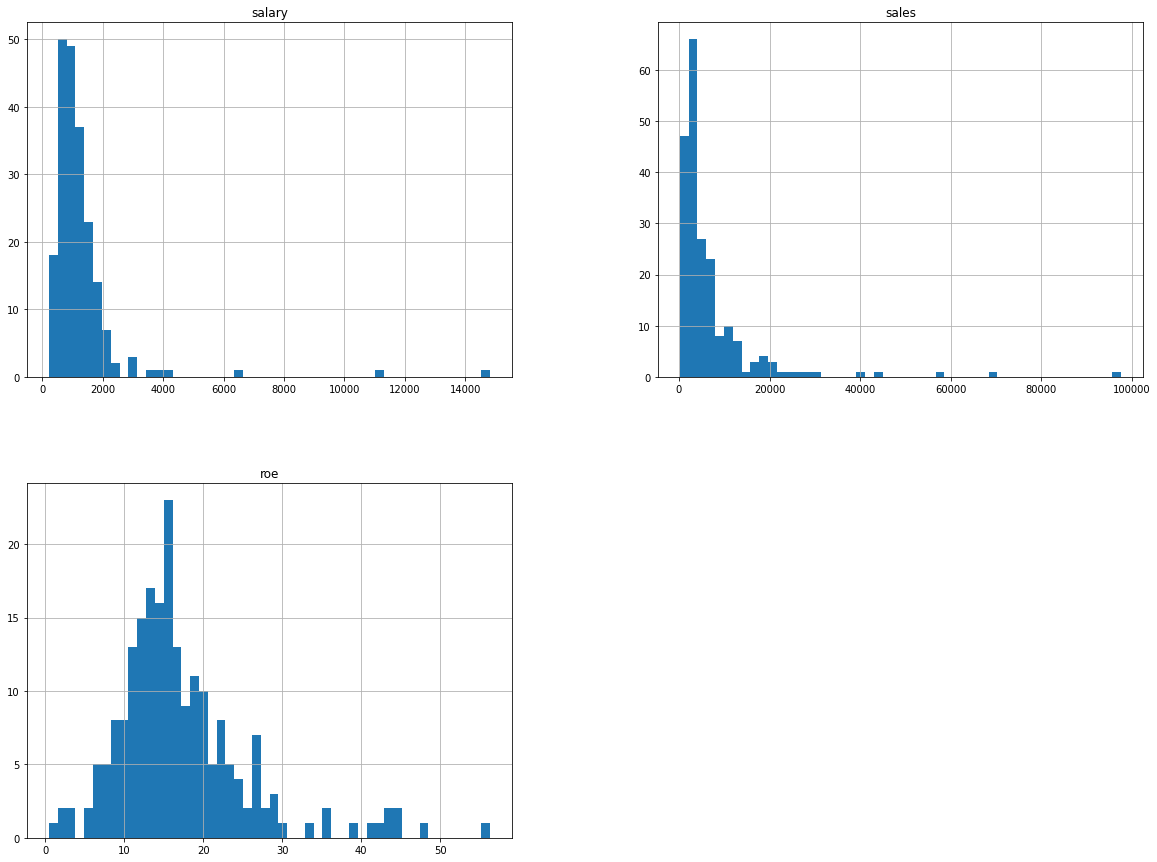

In [26]:
# 히스토그램 확인하기
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

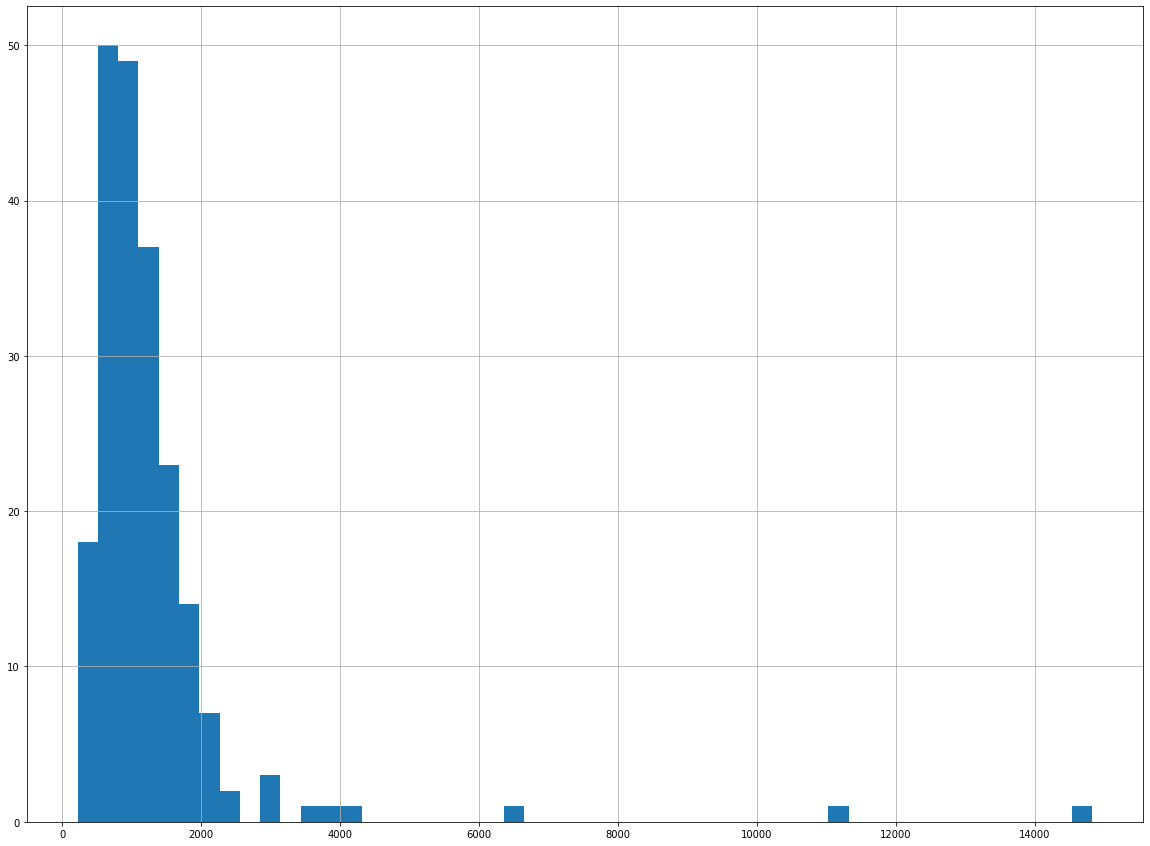

In [28]:
# 특정 한 변수만
data['salary'].hist(bins=50, figsize=(20,15))

#### 이상치문제 해결
- 제거 : 일부 큰 값이나 작은 값 제거해 정규성에 근거
- 변환 : log변환이나 제곱근 변환


# 2. 데이터 탐색: 이변량

In [29]:
data.corr()

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [30]:
data.corr(method="pearson")

,salary,sales,roe
salary,1.000000,0.119869,0.114842
sales,0.119869,1.000000,-0.055386
roe,0.114842,-0.055386,1.000000


In [31]:
data.corr(method="spearman")

,salary,sales,roe
salary,1.000000,0.528016,0.205984
sales,0.528016,1.000000,-0.170548
roe,0.205984,-0.170548,1.000000


In [32]:
data.corr(method="kendall")

,salary,sales,roe
salary,1.000000,0.363921,0.143672
sales,0.363921,1.000000,-0.123844
roe,0.143672,-0.123844,1.000000


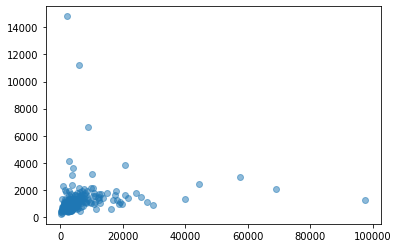

In [33]:
# sales와 salary 간 산점도 비교
import matplotlib.pyplot as plt
plt.scatter(data['sales'], data['salary'], alpha=0.5)
plt.show()

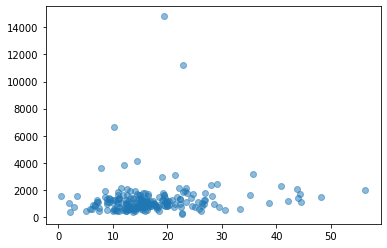

In [34]:
plt.scatter(data['roe'], data['salary'], alpha=0.5)
plt.show()


In [35]:
# 산업범주별로 종속변수인 salary의 평균 및 기술통계량 파악을 위한 group by 함수 사용

data.groupby('industry')[['salary']].describe()
# ceo연봉이 가장 높음

salary                                                            \
          count         mean          std    min     25%     50%      75%   
industry                                                                    
finance    60.0  1722.416667  2242.687041  223.0  911.00  1246.0  1643.75   
it         46.0  1344.913043  1002.813128  441.0  884.00  1119.5  1406.00   
others     31.0   627.870968   175.264323  333.0  501.50   607.0   726.00   
service    72.0  1153.875000   563.472032  256.0  811.25  1064.0  1348.50   

                   
              max  
industry           
finance   14822.0  
it         6640.0  
others     1100.0  
service    3844.0

# 3. 이상치 처리
- boxplot 사용해 파악

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x0000028956A7F190>, <matplotlib.lines.Line2D object at 0x0000028956A7F460>], 'caps': [<matplotlib.lines.Line2D object at 0x0000028956A7F7F0>, <matplotlib.lines.Line2D object at 0x0000028956A7FA00>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000028956A5BBE0>], 'medians': [<matplotlib.lines.Line2D object at 0x0000028956A7FCD0>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000028956A7FFA0>], 'means': []})

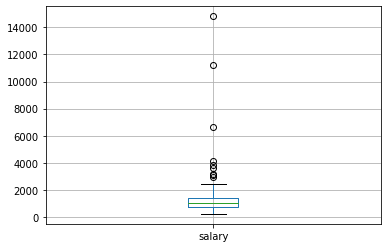

In [38]:
data.boxplot(column='salary', return_type='both')


BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x0000028956B52700>, <matplotlib.lines.Line2D object at 0x0000028956B529D0>], 'caps': [<matplotlib.lines.Line2D object at 0x0000028956B52CA0>, <matplotlib.lines.Line2D object at 0x0000028956B52F70>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000028956B52430>], 'medians': [<matplotlib.lines.Line2D object at 0x0000028956B60280>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000028956B60580>], 'means': []})

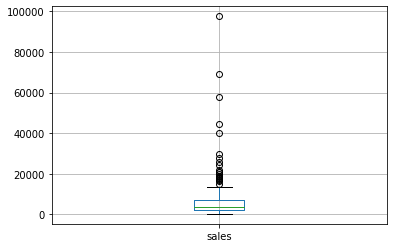

In [40]:
data.boxplot(column='sales', return_type='both')

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x0000028956BB3C10>, <matplotlib.lines.Line2D object at 0x0000028956BB3EE0>], 'caps': [<matplotlib.lines.Line2D object at 0x0000028956BC4220>, <matplotlib.lines.Line2D object at 0x0000028956BC44F0>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000028956BB3940>], 'medians': [<matplotlib.lines.Line2D object at 0x0000028956BC47C0>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000028956BC4A90>], 'means': []})

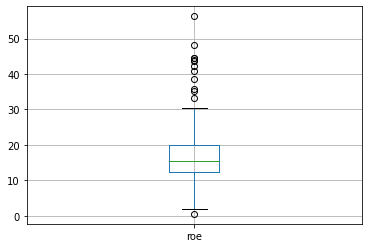

In [41]:

data.boxplot(column='roe', return_type='both')

### 3.1 salary 변수 이상치 처리
#### IQR를 기준으로 처리해보는 과정

In [60]:
Q1_salary = data['salary'].quantile(q=0.25)
Q3_salary = data['salary'].quantile(q=0.75)
IQR_salary = Q3_salary - Q1_salary
IQR_salary

671.0

##### -> IQR의 1.5배보다 큰 값과 작은 값 제거

In [66]:
data_IQR = data[(data['salary'] < Q3_salary + IQR_salary * 1.5) & (data['salary'] > Q1_salary - IQR_salary * 1.5)]

<AxesSubplot:>

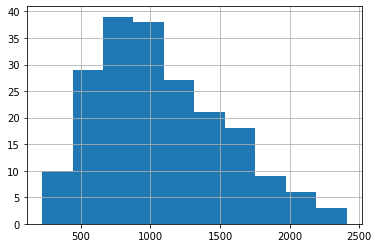

In [67]:
data_IQR['salary'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

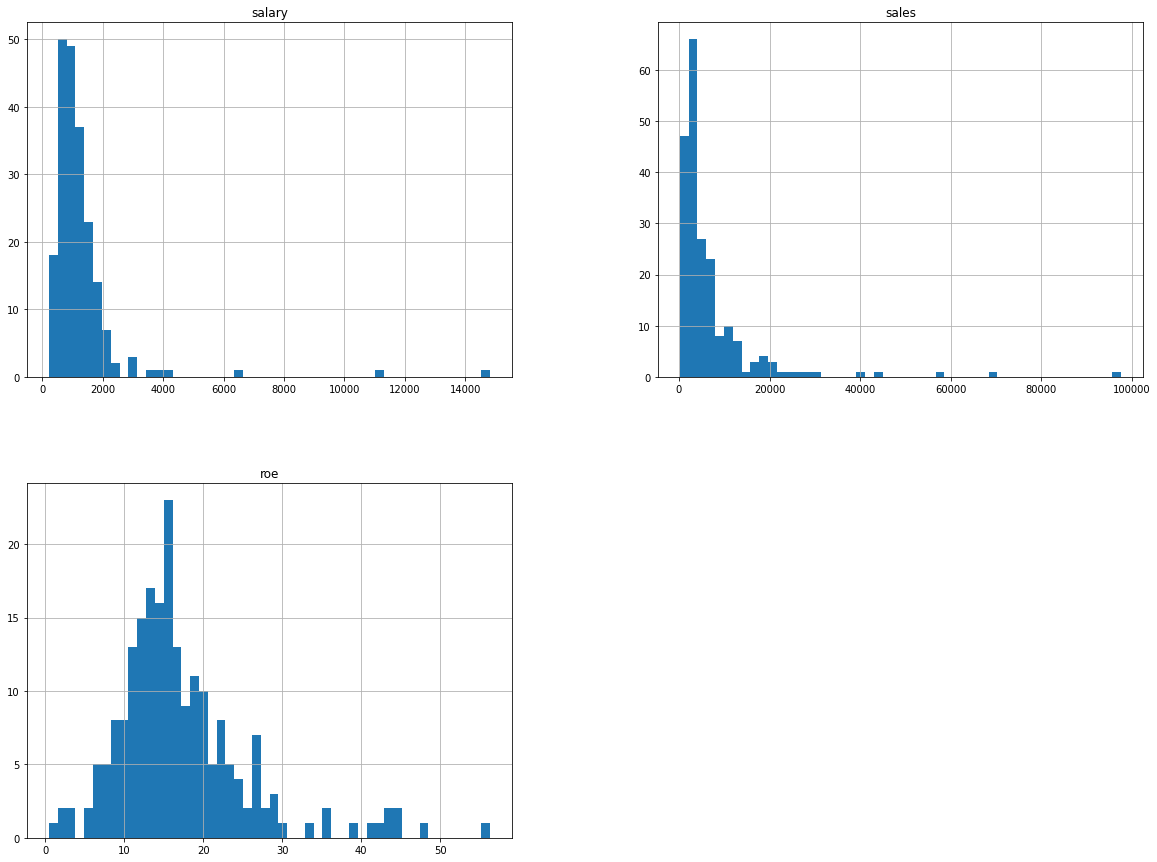

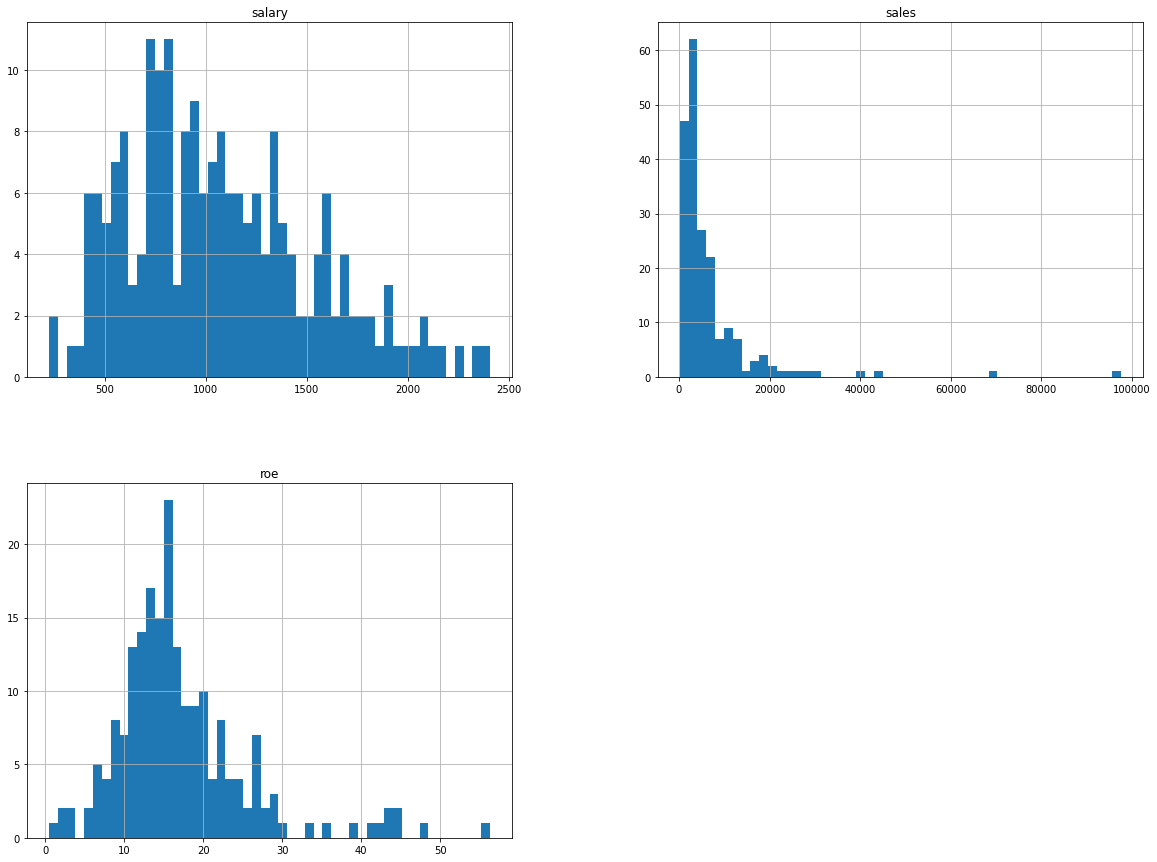

In [68]:
data.hist(bins=50, figsize=(20,15)) # 이상치 제거 전
data_IQR.hist(bins =50, figsize =(20,15)) # 제거 후

In [69]:
data.corr()
data_IQR.corr()
# 상관계수가 더 높아졌음

,salary,sales,roe
salary,1.000000,0.335446,0.289704
sales,0.335446,1.000000,-0.065034
roe,0.289704,-0.065034,1.000000


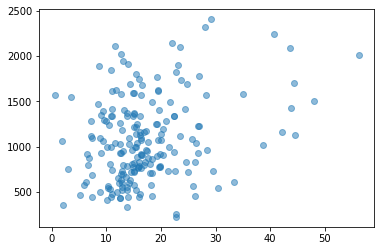

In [70]:
plt.scatter(data_IQR['roe'], data_IQR['salary'], alpha=0.5)
plt.show()
# 분포도가 골고루 되어졌음

## 3.2 sales 변수 이상치 처리



In [71]:
Q1_sales = data['sales'].quantile(q=0.25)
Q3_sales = data['sales'].quantile(q=0.75)
IQR_sales = Q3_sales-Q1_sales
IQR_sales


4966.6999511718695

In [72]:

data_IQR=data[(data['sales']<Q3_sales+IQR_sales*1.5)& (data['sales']>Q1_sales-IQR_sales*1.5) &
              (data['salary']<Q3_salary+IQR_salary*1.5)& (data['salary']>Q1_salary-IQR_salary*1.5)]

<AxesSubplot:>

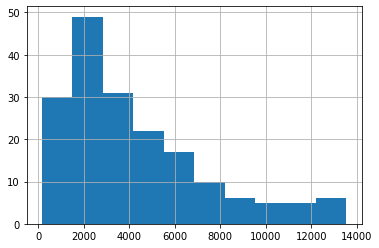

In [73]:
data_IQR['sales'].hist()


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>, <AxesSubplot:>]],
      dtype=object)

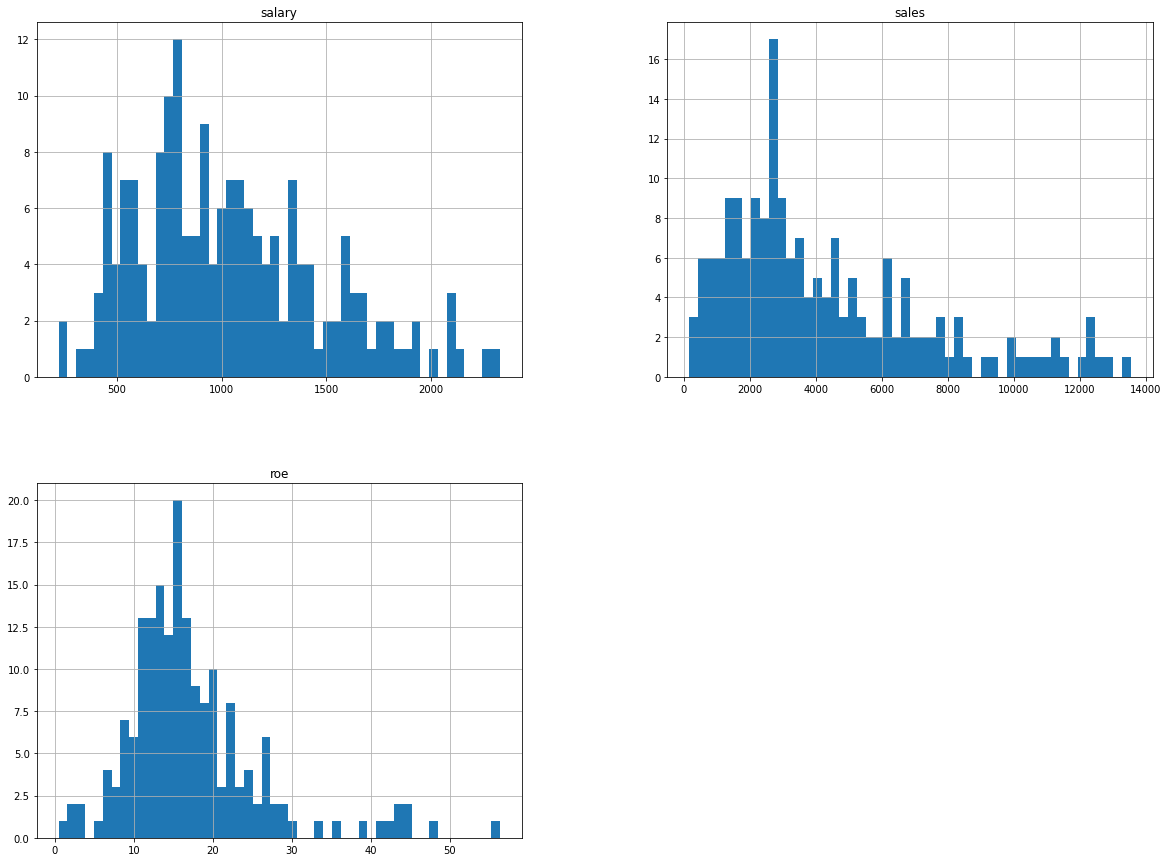

In [74]:
data_IQR.hist(bins=50, figsize=(20,15))




In [75]:
data_IQR.corr()

,salary,sales,roe
salary,1.000000,0.471278,0.299153
sales,0.471278,1.000000,-0.076046
roe,0.299153,-0.076046,1.000000


# 4. 변수 변환
## 4-1. log 변환
- np.log()

In [77]:
import numpy as np
data['log_salary']=np.log(data['salary'])
data['log_sales']=np.log(data['sales'])
data['log_roe']=np.log(data['roe'])

In [78]:
data.head()


,salary,sales,roe,industry,log_salary,log_sales,log_roe
0,1095,27595.000000,14.1,service,6.998510,10.225390,2.646175
1,1001,9958.000000,10.9,service,6.908755,9.206132,2.388763
2,1122,6125.899902,23.5,service,7.022868,8.720281,3.157000
3,578,16246.000000,5.9,service,6.359574,9.695602,1.774952
4,1368,21783.199219,13.8,service,7.221105,9.988894,2.624669


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'log_salary'}>],
       [<AxesSubplot:title={'center':'log_sales'}>,
        <AxesSubplot:title={'center':'log_roe'}>]], dtype=object)

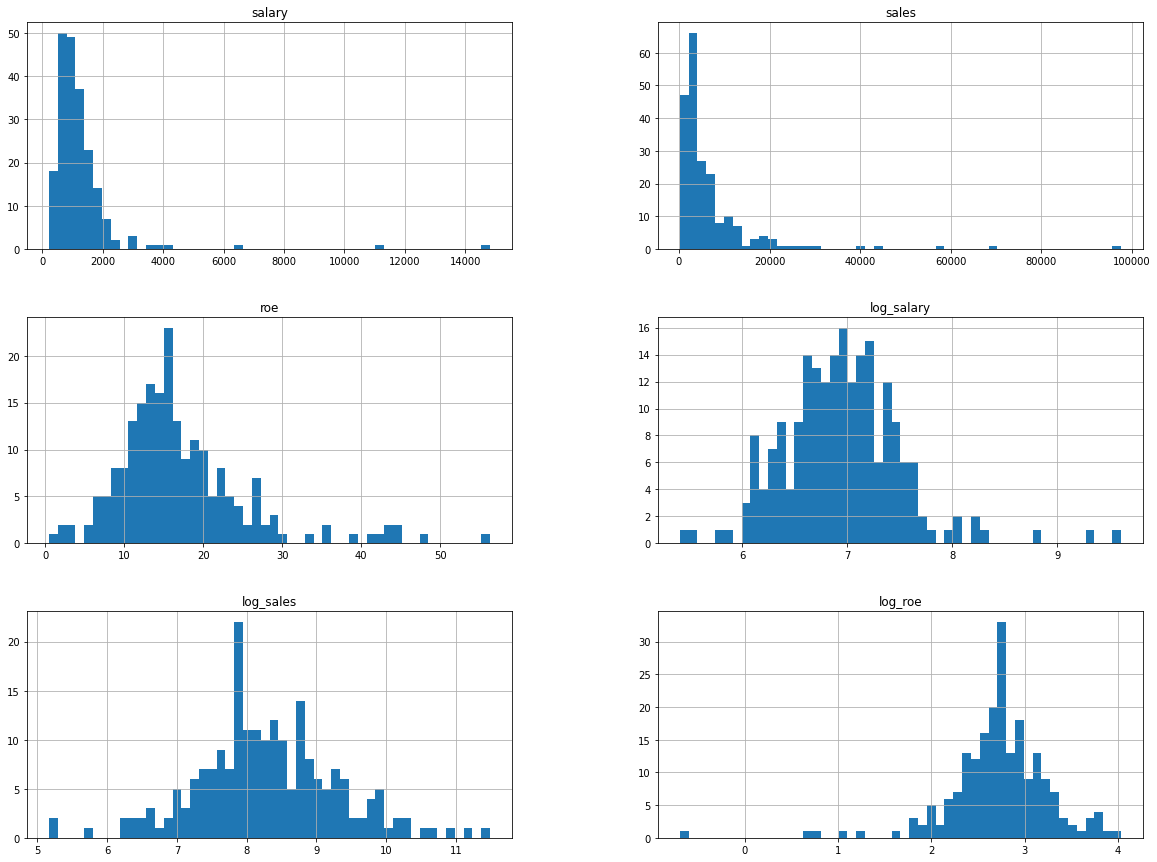

In [80]:
data.hist(bins=50, figsize=(20,15))
# 이상치값이 중앙으로 이동함

In [82]:
data.corr()
# 상관계수도 높아졌음

,salary,sales,roe,log_salary,log_sales,log_roe
salary,1.000000,0.119869,0.114842,0.794208,0.194092,0.101526
sales,0.119869,1.000000,-0.055386,0.281286,0.742921,-0.041004
roe,0.114842,-0.055386,1.000000,0.208499,-0.122553,0.873419
log_salary,0.794208,0.281286,0.208499,1.000000,0.459148,0.163548
log_sales,0.194092,0.742921,-0.122553,0.459148,1.000000,-0.120642
log_roe,0.101526,-0.041004,0.873419,0.163548,-0.120642,1.000000


## 4-2. 제곱근 변환
- np.sqrt()

In [83]:
data['sqrt_salary']=np.sqrt(data['salary'])
data['sqrt_sales']=np.sqrt(data['sales'])
data['sqrt_roe']=np.sqrt(data['roe'])


In [84]:
data.head()

,salary,sales,roe,industry,log_salary,log_sales,log_roe,sqrt_salary,sqrt_sales,sqrt_roe
0,1095,27595.000000,14.1,service,6.998510,10.225390,2.646175,33.090784,166.117428,3.754997
1,1001,9958.000000,10.9,service,6.908755,9.206132,2.388763,31.638584,99.789779,3.301515
2,1122,6125.899902,23.5,service,7.022868,8.720281,3.157000,33.496268,78.268128,4.847680
3,578,16246.000000,5.9,service,6.359574,9.695602,1.774952,24.041631,127.459798,2.428992
4,1368,21783.199219,13.8,service,7.221105,9.988894,2.624669,36.986484,147.591325,3.714835


array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'roe'}>],
       [<AxesSubplot:title={'center':'log_salary'}>,
        <AxesSubplot:title={'center':'log_sales'}>,
        <AxesSubplot:title={'center':'log_roe'}>],
       [<AxesSubplot:title={'center':'sqrt_salary'}>,
        <AxesSubplot:title={'center':'sqrt_sales'}>,
        <AxesSubplot:title={'center':'sqrt_roe'}>]], dtype=object)

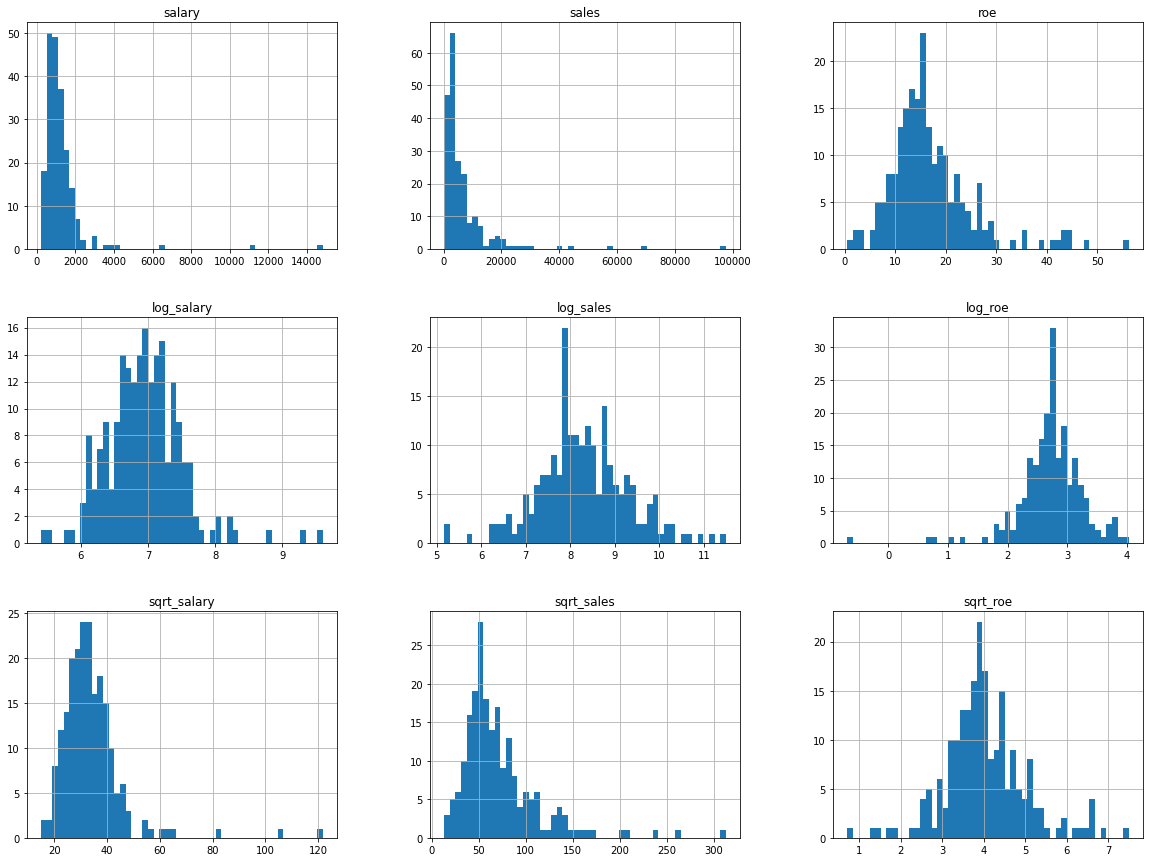

In [85]:
data.hist(bins=50, figsize=(20,15))


# 5. 결측치 처리



In [89]:
import pandas as pd
data =pd.read_csv('제공자료/Ex_Missing.csv')
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


## 5.1 결측치 확인
- isnull() : 결측이면 True, 아니면 False
- notnull() : 결측이면 False, 아니면 True

In [92]:
pd.isnull(data)
data.isnull()

,salary,sales,roe,industry
0,False,False,False,False
1,True,False,False,False
2,True,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,True,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,True,False


In [93]:
pd.notnull(data)
data.notnull()

,salary,sales,roe,industry
0,True,True,True,True
1,False,True,True,True
2,False,True,True,True
3,True,True,True,True
4,True,False,True,True
5,True,False,True,True
6,True,True,True,True
7,True,True,True,True
8,True,True,True,True
9,True,True,False,True


#### 변수별로 결측치 갯수 확인

In [99]:
print(pd.isnull(data).sum())
# 변수(컬럼)별로 결측값 개수 확인: df.isnull().sum()
data.isnull().sum()

salary      2
sales       2
roe         1
industry    0
dtype: int64


In [101]:
# 특정 변수(컬럼)의 결측값 개수 확인: df.isnull().sum()
data['salary'].isnull().sum()

2

In [102]:
# 변수(컬럼)별로 결측 아닌 값의 개수 확인: df.notnull().sum()
data.notnull().sum()

salary       8
sales        8
roe          9
industry    10
dtype: int64

In [103]:
# 특정 변수(컬럼)의 결측 아닌 값의 개수 확인: df.notnull().sum()
data['salary'].notnull().sum()


8

### 나. 행별 결측 확인 및 저장


In [105]:
# 행(row) 단위로 결측값 개수 구하기 : df.isnull().sum(1)
data.isnull().sum(1)

0    0
1    1
2    1
3    0
4    1
5    1
6    0
7    0
8    0
9    1
dtype: int64

In [106]:
# 행(row) 단위로 결측값 개수 구해서 새변수 생성하기
data['missing']=data.isnull().sum(1)
data


,salary,sales,roe,industry,missing
0,1095.0,27595.000000,14.100000,1,0
1,NaN,9958.000000,10.900000,1,1
2,NaN,6125.899902,23.500000,1,1
3,578.0,16246.000000,5.900000,1,0
4,1368.0,NaN,13.800000,1,1
5,1145.0,NaN,20.000000,2,1
6,1078.0,2266.699951,16.400000,2,0
7,1094.0,2966.800049,16.299999,2,0
8,1237.0,4570.200195,10.500000,2,0
9,833.0,2830.000000,NaN,2,1


In [107]:
# 행(row) 단위로 실측값 개수 구하기 : df.notnull().sum(1)
del data['missing']
data['valid']=data.notnull().sum(1)
data

,salary,sales,roe,industry,valid
0,1095.0,27595.000000,14.100000,1,4
1,NaN,9958.000000,10.900000,1,3
2,NaN,6125.899902,23.500000,1,3
3,578.0,16246.000000,5.900000,1,4
4,1368.0,NaN,13.800000,1,3
5,1145.0,NaN,20.000000,2,3
6,1078.0,2266.699951,16.400000,2,4
7,1094.0,2966.800049,16.299999,2,4
8,1237.0,4570.200195,10.500000,2,4
9,833.0,2830.000000,NaN,2,3


## 5-2. 결측값 제거: dropna()

- 결측값이 있는 행 제거: delete row with missing values
- 결측값이 있는 열 제거: delete column with missing values
- 결측값이 있는 특정 행 또는 열 제거: delete specific row or column with missing values

### 가. 결측값 있는 행(row/case) 제거

In [109]:
data_del_row =data.dropna(axis=0)
print(data_del_row)

   salary         sales        roe  industry  valid
0  1095.0  27595.000000  14.100000         1      4
3   578.0  16246.000000   5.900000         1      4
6  1078.0   2266.699951  16.400000         2      4
7  1094.0   2966.800049  16.299999         2      4
8  1237.0   4570.200195  10.500000         2      4


### 나. 결측값 있는 열(column/variable) 제거

In [110]:
data_del_col=data.dropna(axis=1)
data_del_col

,industry,valid
0,1,4
1,1,3
2,1,3
3,1,4
4,1,3
5,2,3
6,2,4
7,2,4
8,2,4
9,2,3


### 다. 결측값 있는 특정 행/열 제거

In [111]:
data[['salary']].dropna()

,salary
0,1095.0
3,578.0
4,1368.0
5,1145.0
6,1078.0
7,1094.0
8,1237.0
9,833.0


In [112]:
data[['salary', 'sales', 'roe', 'industry']].dropna()

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [114]:
data[['salary', 'sales', 'roe', 'industry']].dropna(axis=0)

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
3,578.0,16246.000000,5.900000,1
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2


In [113]:
data[['salary', 'sales', 'roe', 'industry']].dropna(axis=1)


,industry
0,1
1,1
2,1
3,1
4,1
5,2
6,2
7,2
8,2
9,2


## 5-3. 결측값 대체

- 결측값을 특정 값으로 대체: replace missing valeus with scalar value
- 결측값을 변수별 평균으로 대체: filling missing values with mean value per columns
- 결측값을 다른 변수의 값으로 대체: filling missing values with another columns' values
- 결측값을 그룹 평균값으로 대체: fill missing values by Group means


In [115]:
import pandas as pd
data =pd.read_csv('제공자료/Ex_Missing.csv')
data

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,NaN,9958.000000,10.900000,1
2,NaN,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,NaN,13.800000,1
5,1145.0,NaN,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


### 가. 특정값으로 대체: df.fillna(value/string)

In [119]:
# 결측값 0으로 대체
data_0 = data.fillna(0)
data_0



,salary,sales,roe,industry
0,1095.0,27595.0,14.1,1
1,missing,9958.0,10.9,1
2,missing,6125.899902,23.5,1
3,578.0,16246.0,5.9,1
4,1368.0,missing,13.8,1
5,1145.0,missing,20.0,2
6,1078.0,2266.699951,16.4,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.5,2
9,833.0,2830.0,missing,2


In [120]:
# 결측값을 'missing' 문자로 대체
data_missing = data.fillna('missing')
data_missing

,salary,sales,roe,industry
0,1095.0,27595.0,14.1,1
1,missing,9958.0,10.9,1
2,missing,6125.899902,23.5,1
3,578.0,16246.0,5.9,1
4,1368.0,missing,13.8,1
5,1145.0,missing,20.0,2
6,1078.0,2266.699951,16.4,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.5,2
9,833.0,2830.0,missing,2


In [121]:
# 결측값을 앞 방향으로 채우기: df.fillna(method='ffill' or 'pad')
# 해당 값의 앞의 값으로 대체
data_ffill=data.fillna(method='ffill')
data_ffill


,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1095.0,9958.000000,10.900000,1
2,1095.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,16246.000000,13.800000,1
5,1145.0,16246.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,10.500000,2


In [122]:
# 결측값을 앞 방향으로 채우기: df.fillna(method='ffill' or 'pad')
data_pad=data.fillna(method='pad')
data_pad



,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1095.0,9958.000000,10.900000,1
2,1095.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,16246.000000,13.800000,1
5,1145.0,16246.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,10.500000,2


In [124]:
# 결측값을 뒷 방향으로 채우기: df.fillna(method='bfill' or 'backfill')
data_bfill=data.fillna(method='bfill')
data_bfill

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,578.0,9958.000000,10.900000,1
2,578.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,2266.699951,13.800000,1
5,1145.0,2266.699951,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


In [125]:
# 결측값을 뒷 방향으로 채우기: df.fillna(method='bfill' or 'backfill')
data_backfill=data.fillna(method='backfill')
data_backfill



,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,578.0,9958.000000,10.900000,1
2,578.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,2266.699951,13.800000,1
5,1145.0,2266.699951,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,NaN,2


### 나. 평균 대체:
- df.fillna(df.mean())
- df.where(pd.notnull(df), df.mean(), axis='columns')

In [126]:
data_mean = data.fillna(data.mean())
data_mean

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1053.5,9958.000000,10.900000,1
2,1053.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,9069.825012,13.800000,1
5,1145.0,9069.825012,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,14.600000,2


In [127]:
# 중위수로 대체
data_median=data.fillna(data.median())
data_median


,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1094.5,9958.000000,10.900000,1
2,1094.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,5348.050049,13.800000,1
5,1145.0,5348.050049,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,14.100000,2


In [128]:
# 최대/최소로 대체
data_max=data.fillna(data.max())
data_max


,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1368.0,9958.000000,10.900000,1
2,1368.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,27595.000000,13.800000,1
5,1145.0,27595.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,23.500000,2


In [129]:
# 다른 변수 평균으로 대체
# salary 변수의 평균값으로 모든 결측값 대체
data_other_mean=data.fillna(data.mean()['salary'])
data_other_mean

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1053.5,9958.000000,10.900000,1
2,1053.5,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,1053.500000,13.800000,1
5,1145.0,1053.500000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,1053.500000,2


### 다. 다른 변수 값으로 대체

In [132]:
# sales의 결측값을 salary 값으로 대체
import numpy as np
data2=data.copy()
data2['sales_new'] = np.where(pd.notnull(data2['sales']) == True, data2['sales'], data2['salary'])
data2

,salary,sales,roe,industry,sales_new
0,1095.0,27595.000000,14.100000,1,27595.000000
1,NaN,9958.000000,10.900000,1,9958.000000
2,NaN,6125.899902,23.500000,1,6125.899902
3,578.0,16246.000000,5.900000,1,16246.000000
4,1368.0,NaN,13.800000,1,1368.000000
5,1145.0,NaN,20.000000,2,1145.000000
6,1078.0,2266.699951,16.400000,2,2266.699951
7,1094.0,2966.800049,16.299999,2,2966.800049
8,1237.0,4570.200195,10.500000,2,4570.200195
9,833.0,2830.000000,NaN,2,2830.000000


### 라. 집단 평균값으로 대체

In [133]:
# 산업별 평균 확인
data.groupby('industry').mean()

,salary,sales,roe
industry,,,
1,1013.666667,14981.224976,13.64
2,1077.400000,3158.425049,15.80


In [134]:
# 평균으로 대체한다는 람다함수 생성
fill_mean_func = lambda g: g.fillna(g.mean())

# 람다함수를 apply()를 이용해 집단별 평균을 적용
data_group_mean = data.groupby('industry').apply(fill_mean_func)
data_group_mean

salary         sales        roe  industry
industry                                                  
1        0  1095.000000  27595.000000  14.100000         1
         1  1013.666667   9958.000000  10.900000         1
         2  1013.666667   6125.899902  23.500000         1
         3   578.000000  16246.000000   5.900000         1
         4  1368.000000  14981.224975  13.800000         1
2        5  1145.000000   3158.425049  20.000000         2
         6  1078.000000   2266.699951  16.400000         2
         7  1094.000000   2966.800049  16.299999         2
         8  1237.000000   4570.200195  10.500000         2
         9   833.000000   2830.000000  15.800000         2

- 집단별 특정 값으로 대체

In [135]:
# 집단별로 변경할 값 설정
fill_values = {1:1000, 2:2000}

# lambda 함수 적용
fill_func = lambda d: d.fillna(fill_values[d.name])

In [136]:
# 집단별 apply
data_group_value = data.groupby('industry').apply(fill_func)
data_group_value

,salary,sales,roe,industry
0,1095.0,27595.000000,14.100000,1
1,1000.0,9958.000000,10.900000,1
2,1000.0,6125.899902,23.500000,1
3,578.0,16246.000000,5.900000,1
4,1368.0,1000.000000,13.800000,1
5,1145.0,2000.000000,20.000000,2
6,1078.0,2266.699951,16.400000,2
7,1094.0,2966.800049,16.299999,2
8,1237.0,4570.200195,10.500000,2
9,833.0,2830.000000,2000.000000,2


- 변수별 다른 대체방법을 한번에 적용

In [138]:
# interpolate 보간범
missing_fill_val ={'salary': data.salary.interpolate(),
                   'sales': data.sales.mean(),
                   'roe': 'missing'}
print(missing_fill_val)

{'salary': 0    1095.000000
1     922.666667
2     750.333333
3     578.000000
4    1368.000000
5    1145.000000
6    1078.000000
7    1094.000000
8    1237.000000
9     833.000000
Name: salary, dtype: float64, 'sales': 9069.825012125, 'roe': 'missing'}


In [139]:
data_multi_fillna = data.fillna(missing_fill_val)
data_multi_fillna

,salary,sales,roe,industry
0,1095.000000,27595.000000,14.1,1
1,922.666667,9958.000000,10.9,1
2,750.333333,6125.899902,23.5,1
3,578.000000,16246.000000,5.9,1
4,1368.000000,9069.825012,13.8,1
5,1145.000000,9069.825012,20.0,2
6,1078.000000,2266.699951,16.4,2
7,1094.000000,2966.800049,16.299999,2
8,1237.000000,4570.200195,10.5,2
9,833.000000,2830.000000,missing,2
